In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import string
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib


In [2]:
fto = '/storage/experiments/2023/05_LSvezicka/'


/storage/experiments/2023/05_LSvezicka/efm_down.csv.2023-05-28_14
/storage/experiments/2023/05_LSvezicka/efm_down.csv.2023-05-28_13
/storage/experiments/2023/05_LSvezicka/efm_up.csv.2023-05-28_13
/storage/experiments/2023/05_LSvezicka/efm_up.csv.2023-05-28_14
/storage/experiments/2023/05_LSvezicka/efm_down.csv.2023-05-28_15
/storage/experiments/2023/05_LSvezicka/efm_up.csv.2023-05-28_15


Text(0.5, 0, 'Time')

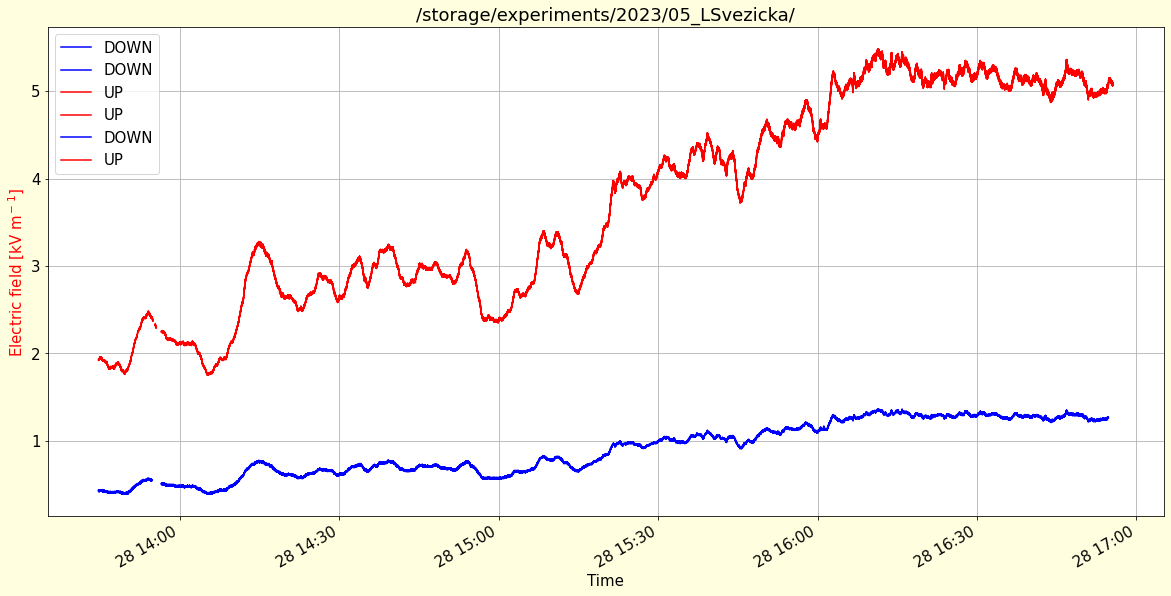

In [45]:
ftt = glob.iglob(fto+"*.csv.*") # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

offset = 0

for f in ftt:
    print(f)
    if 'up' in f:
        label = 'UP'
        color = 'red'
    else:
        label = 'DOWN'
        color = 'blue'
    l=[]
    l.extend(range(0,4))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    #df = pd.read_csv(f, sep=',', header=None, comment='*', low_memory=False)
    
    df['field'] = df[1].str.extract('(\d+.\d+)', expand=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    df['field'].plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
plt.legend()
plt.grid()
plt.xlabel('Time')
#plt.xlim(3000,3400)

In [34]:
df

,0,1,2,field,time
time,,,,,
2023-05-28 14:54:43.040000000,1.685286e+09,$+00.72,0,0.72,2023-05-28 14:54:43.040000000
2023-05-28 14:54:43.089999872,1.685286e+09,$+00.72,0,0.72,2023-05-28 14:54:43.089999872
2023-05-28 14:54:43.140000000,1.685286e+09,$+00.72,0,0.72,2023-05-28 14:54:43.140000000
2023-05-28 14:54:43.190000128,1.685286e+09,$+00.72,0,0.72,2023-05-28 14:54:43.190000128
2023-05-28 14:54:43.230000128,1.685286e+09,$+00.71,0,0.71,2023-05-28 14:54:43.230000128
...,...,...,...,...,...
2023-05-28 15:54:42.809999872,1.685289e+09,$+01.13,0,1.13,2023-05-28 15:54:42.809999872
2023-05-28 15:54:42.849999872,1.685289e+09,$+01.13,0,1.13,2023-05-28 15:54:42.849999872
2023-05-28 15:54:42.900000000,1.685289e+09,$+01.14,0,1.14,2023-05-28 15:54:42.900000000
